In [1]:
#Q1

from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [7]:
import pandas as pd


df = pd.read_csv('data.csv')
df.head()



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


features = df.drop(columns='country')

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

pca = PCA()
pca_components = pca.fit_transform(scaled_features)


loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(len(features.columns))],
                        index=features.columns)

print("Top contributing variables to PC1 and PC2:")
print(loadings[['PC1', 'PC2']].sort_values(by='PC1', key=abs, ascending=False))


Top contributing variables to PC1 and PC2:
                 PC1       PC2
life_expec  0.425839 -0.222707
child_mort -0.419519  0.192884
total_fer  -0.403729  0.155233
income      0.398441  0.022536
gdpp        0.392645 -0.046022
exports     0.283897  0.613163
inflation  -0.193173 -0.008404
imports     0.161482  0.671821
health      0.150838 -0.243087


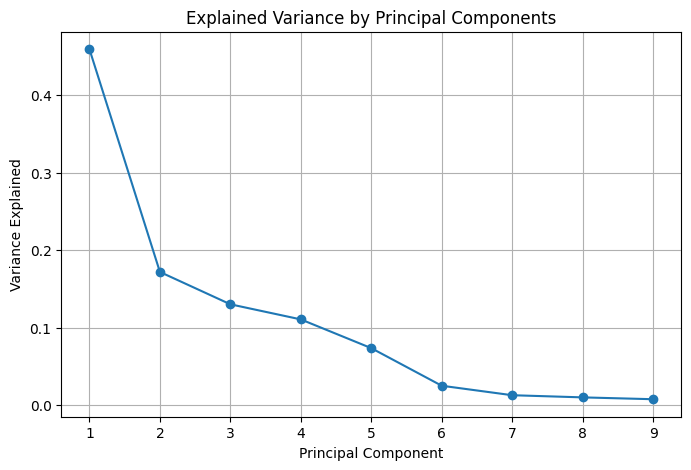

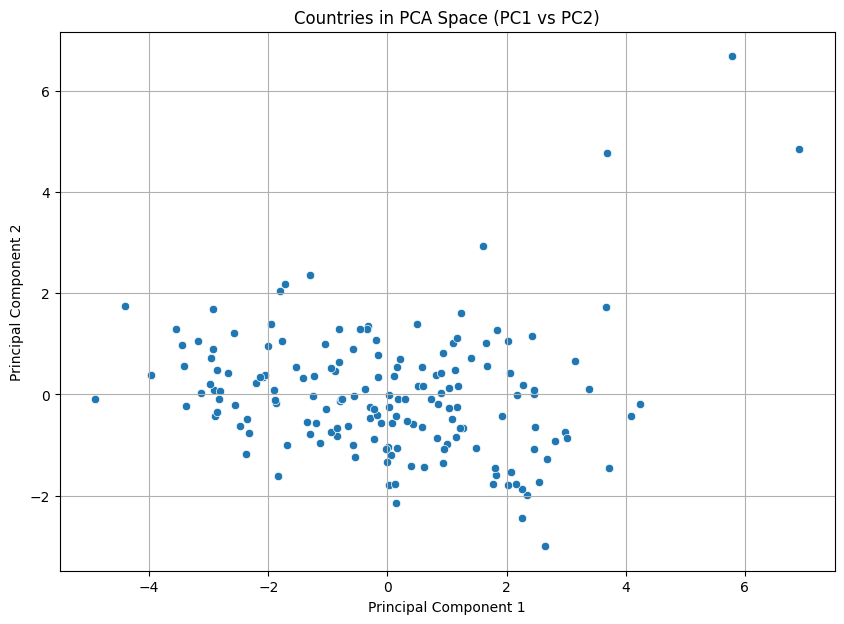

In [9]:
# Scree plot (explained variance)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()

# Biplot of PC1 and PC2
pca_df = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(len(features.columns))])
pca_df['country'] = df['country']

plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2')
plt.title('Countries in PCA Space (PC1 vs PC2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


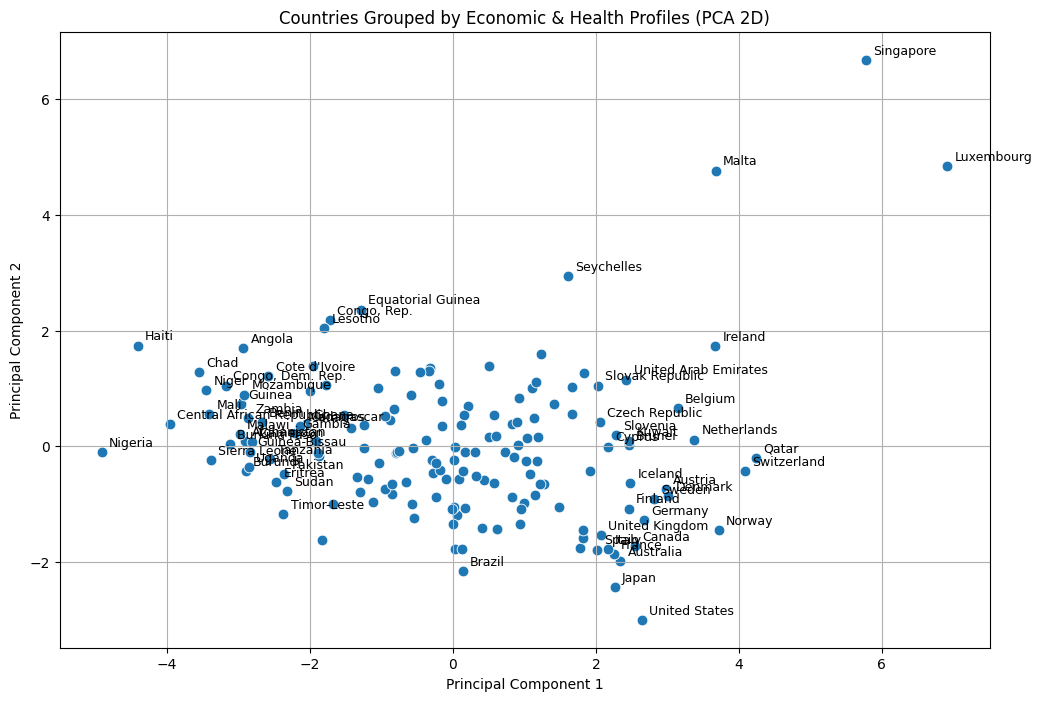

In [10]:
#Q2
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

s
features = df.drop(columns='country')
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)


pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['country'] = df['country']


plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', s=60)


for i in range(len(pca_df)):
    if abs(pca_df['PC1'][i]) > 2 or abs(pca_df['PC2'][i]) > 2:
        plt.text(pca_df['PC1'][i]+0.1, pca_df['PC2'][i]+0.1, pca_df['country'][i], fontsize=9)

plt.title('Countries Grouped by Economic & Health Profiles (PCA 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


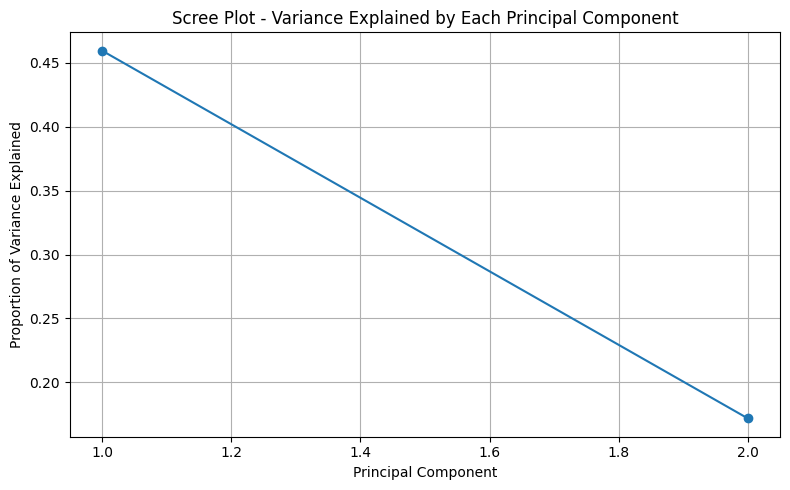

np.float64(0.6313336543771411)

In [11]:
#Q3

explained_variance_ratio = pca.explained_variance_ratio_


variance_pc1_pc2 = explained_variance_ratio[0] + explained_variance_ratio[1]


plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Scree Plot - Variance Explained by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.grid(True)
plt.tight_layout()
plt.show()

variance_pc1_pc2



In [12]:

explained_variance_ratio = pca.explained_variance_ratio_

variance_pc1_pc2 = explained_variance_ratio[0] + explained_variance_ratio[1]
print(f"Variance explained by PC1 and PC2: {variance_pc1_pc2:.2%}")


Variance explained by PC1 and PC2: 63.13%


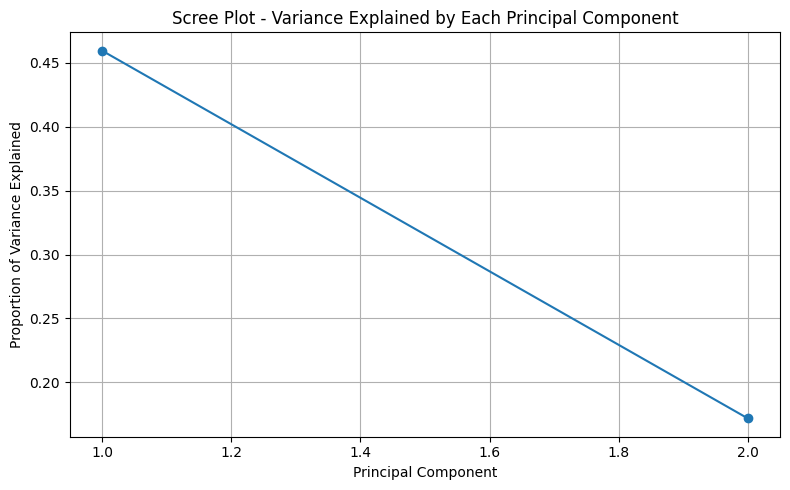

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Scree Plot - Variance Explained by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.grid(True)
plt.tight_layout()
plt.show()


                            OLS Regression Results                            
Dep. Variable:             life_expec   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     98.79
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           1.55e-18
Time:                        07:14:52   Log-Likelihood:                -562.23
No. Observations:                 167   AIC:                             1128.
Df Residuals:                     165   BIC:                             1135.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.7157      0.732     89.832      0.0

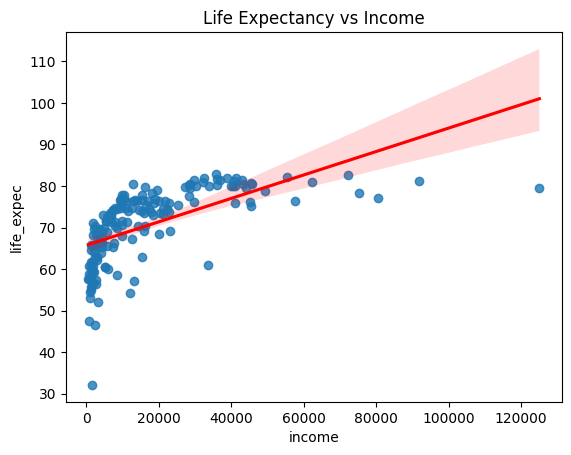

In [14]:
#Q4
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt


X_income = df['income']
y = df['life_expec']

X_income = sm.add_constant(X_income)


model_income = sm.OLS(y, X_income).fit()
print(model_income.summary())


sns.regplot(x='income', y='life_expec', data=df, line_kws={'color': 'red'})
plt.title('Life Expectancy vs Income')
plt.show()


                            OLS Regression Results                            
Dep. Variable:             life_expec   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     7.665
Date:                Mon, 07 Apr 2025   Prob (F-statistic):            0.00628
Time:                        07:15:13   Log-Likelihood:                -597.61
No. Observations:                 167   AIC:                             1199.
Df Residuals:                     165   BIC:                             1205.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.9065      1.810     36.416      0.0

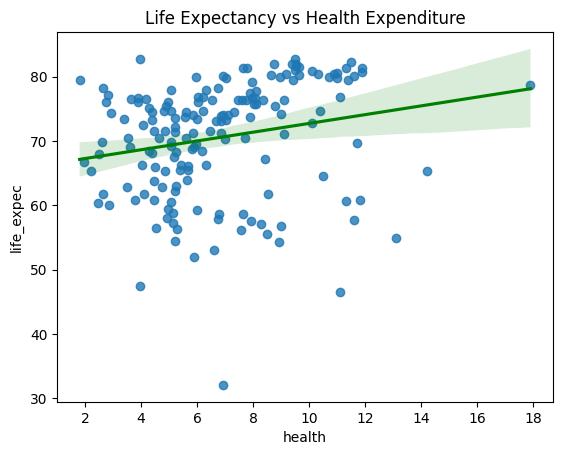

In [15]:

X_health = df['health']
X_health = sm.add_constant(X_health)

model_health = sm.OLS(y, X_health).fit()
print(model_health.summary())

sns.regplot(x='health', y='life_expec', data=df, line_kws={'color': 'green'})
plt.title('Life Expectancy vs Health Expenditure')
plt.show()


In [16]:
#Q5
import statsmodels.api as sm


X = df.drop(columns=['gdpp', 'country'])

y = df['gdpp']


X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   gdpp   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     127.7
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           6.13e-65
Time:                        07:16:58   Log-Likelihood:                -1707.9
No. Observations:                 167   AIC:                             3434.
Df Residuals:                     158   BIC:                             3462.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.193e+04   1.11e+04     -3.768      0.0

5 ANSWER) Income: Strongly correlated with GDP per capita.

Child Mortality: Likely negatively correlated.

Life Expectancy: Could be positively associated.

Health expenditure: May show positive influence.

Inflation: Could have a negative impact.




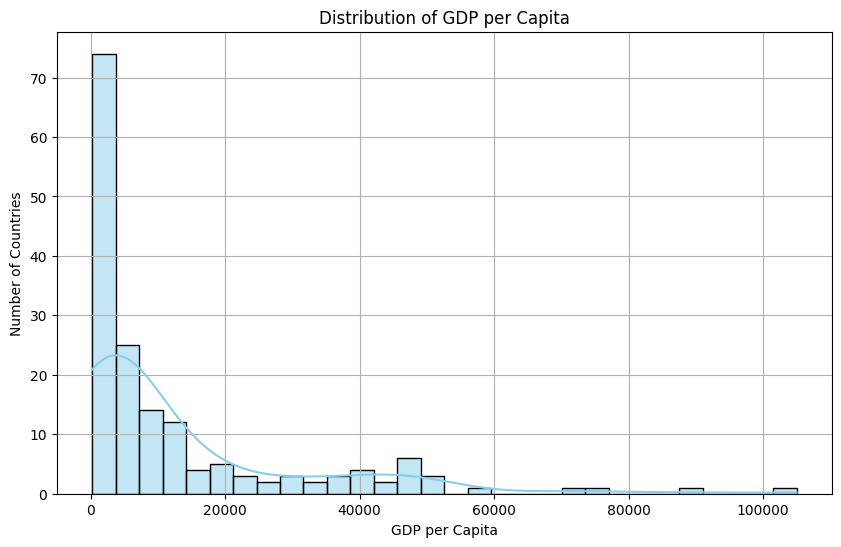

In [17]:
#Q6
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['gdpp'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Number of Countries')
plt.grid(True)
plt.show()


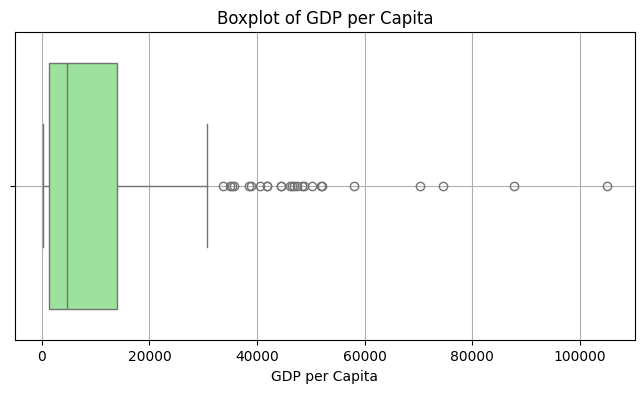

In [18]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['gdpp'], color='lightgreen')
plt.title('Boxplot of GDP per Capita')
plt.xlabel('GDP per Capita')
plt.grid(True)
plt.show()


In [19]:
#Q7
# Find the countries with the highest and lowest child mortality rates
highest_child_mort = df.loc[df['child_mort'].idxmax(), ['country', 'child_mort']]
lowest_child_mort = df.loc[df['child_mort'].idxmin(), ['country', 'child_mort']]

highest_child_mort, lowest_child_mort


(country       Haiti
 child_mort    208.0
 Name: 66, dtype: object,
 country       Iceland
 child_mort        2.6
 Name: 68, dtype: object)

<ipython-input-21-abb9c654d8d5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='country', x='child_mort', data=sorted_df, palette='coolwarm')


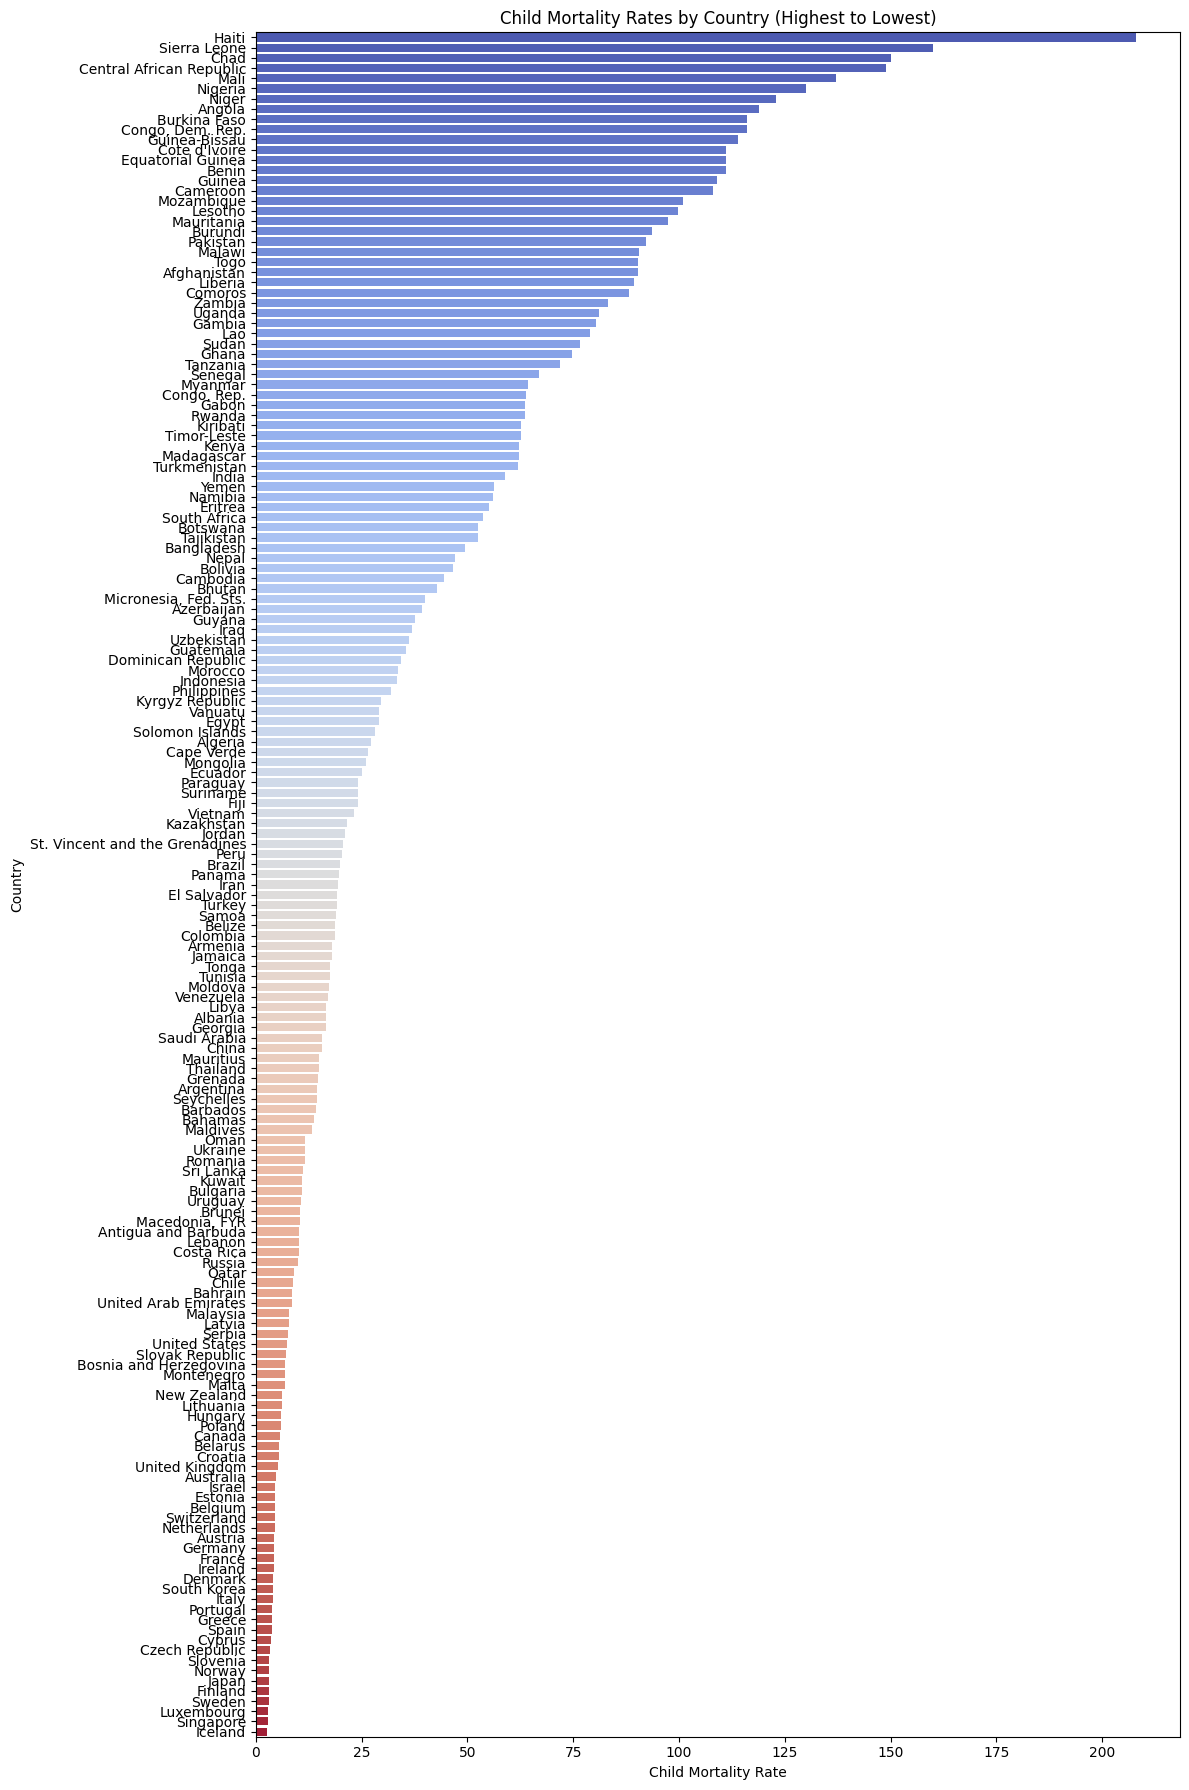

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


sorted_df = df.sort_values(by='child_mort', ascending=False)

plt.figure(figsize=(12, 18))

sns.barplot(y='country', x='child_mort', data=sorted_df, palette='coolwarm')


plt.title('Child Mortality Rates by Country (Highest to Lowest)')
plt.xlabel('Child Mortality Rate')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


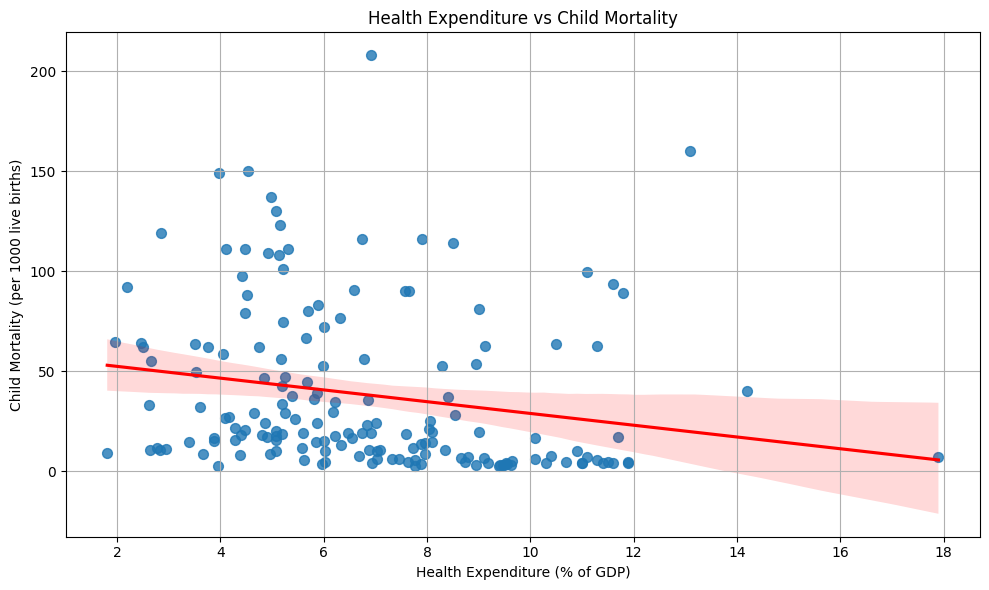

In [22]:
#Q8
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))


sns.regplot(x='health', y='child_mort', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})

plt.title('Health Expenditure vs Child Mortality')
plt.xlabel('Health Expenditure (% of GDP)')
plt.ylabel('Child Mortality (per 1000 live births)')
plt.grid(True)
plt.tight_layout()
plt.show()



A negative slope of the regression line suggests that higher health spending is associated with lower child mortality.

The spread of points tells you how consistent that relationship is across countries.


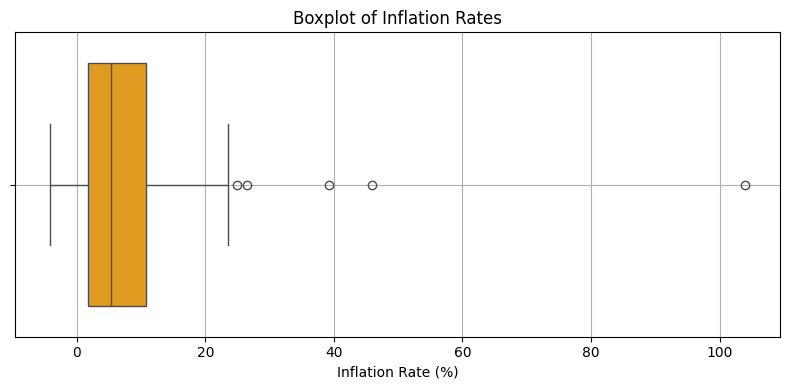

In [23]:
#Q9
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['inflation'], color='orange')

plt.title('Boxplot of Inflation Rates')
plt.xlabel('Inflation Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


The box shows the interquartile range (middle 50% of countries).

The line inside the box is the median.

Dots outside the whiskers are outliers (countries with unusually high or low inflation).


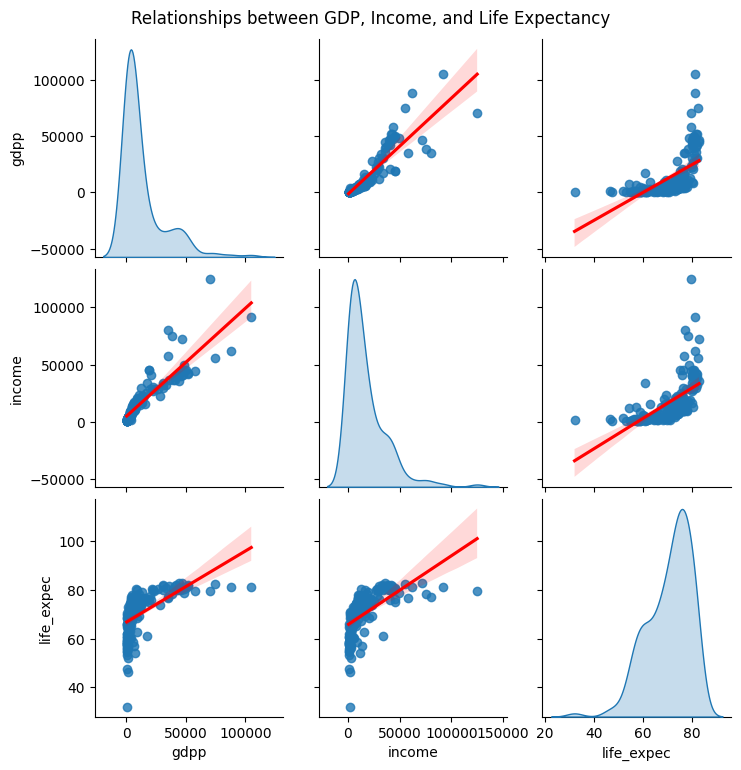

In [24]:
#Q10
import seaborn as sns
import matplotlib.pyplot as plt


pairplot_data = df[['gdpp', 'income', 'life_expec']]


sns.pairplot(pairplot_data, kind='reg', diag_kind='kde', plot_kws={'line_kws': {'color': 'red'}})

plt.suptitle('Relationships between GDP, Income, and Life Expectancy', y=1.02)
plt.show()


Positive correlations:

Higher GDP per capita is associated with higher income.

Both GDP and income tend to correlate positively with life expectancy.

The diagonal plots show the distribution of each variable.

In [29]:
#11
x = 5
if x = 5:
    print("x is 5") --> #ERROR




SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (<ipython-input-29-ffc7ef57f7cc>, line 3)

In [30]:
x = 5
if x == 5:
    print("x is 5")


x is 5


In [ ]:
#Q12
for i in range(5)
    print(i) #ERROR


In [31]:
for i in range(5):
    print(i)


0
1
2
3
4


In [ ]:
#Q13
def greet
    print("Hello") #ERROR

In [34]:
def greet():
    print("Hello")
greet()


Hello


In [ ]:
#Q14

import numpy as np
a = np.array[1, 2, 3, 4] #ERROR

In [36]:
import numpy as np
a = np.array([1, 2, 3, 4])


In [ ]:
#Q15
arr = np.array([10, 20, 30, 40])
indices = [True, False, True]
arr[indices]#ERROR

In [37]:
arr = np.array([10, 20, 30, 40])
indices = [True, False, True, False]
print(arr[indices])


[10 30]
